In [101]:
import xarray as xr 
import glob 
import matplotlib.pyplot as plt
from scipy.signal import detrend

# from windspharm.xarray import VectorWind
import torch_harmonics as harmonics
import torch
import numpy as np
import copy

import credit.pol_lapdiff_filt as plf
import pandas as pd

In [2]:
import xarray as xr 
import os 
import numpy as np 
import sys 
import matplotlib.pyplot as plt 
import glob
import pickle
# from eofs.xarray import Eof

import os
import cartopy.crs as ccrs

import numpy as np
import xarray as xr
import os
from sklearn.preprocessing import QuantileTransformer
from functools import lru_cache

import math
import copy
from pathlib import Path
from random import random
from functools import partial
from collections import namedtuple
from multiprocessing import cpu_count

from scipy.optimize import linear_sum_assignment

from PIL import Image
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

In [54]:
FNS = sorted(glob.glob('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00191_nb/model_00223/1981-01-02T00Z/pred_*.nc'))
DSm = xr.open_dataset('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/mean_6h_1979_2010_32lev_1.0deg_ERA5scaled_F32_Qtot.nc')
DSs = xr.open_dataset('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/std_6h_1979_2010_32lev_1.0deg_ERA5scaled_F32_Qtot.nc')
DS = xr.open_dataset(FNS[0])

In [59]:
for vv in DS.data_vars:
    print(vv)
    try:
        DS[vv][:]=(DS[vv] - np.expand_dims(DSm[vv],[0,2,3])) / np.expand_dims(DSs[vv],[0,2,3])
    except:
        DS[vv][:]=(DS[vv] - DSm[vv].values )/ DSs[vv].values

U
V
T
Qtot
PS
TREFHT
PRECT
CLDTOT
CLDHGH
CLDLOW
CLDMED
TAUX
TAUY
U10
QFLX
FSNS
FLNS
FSNT
FLNT
SHFLX
LHFLX


In [82]:
FNS = sorted(glob.glob('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00191_nb/model_00223/1981-01-02T00Z/1D/*-01_1D.nc'))
# DS = xr.open_mfdataset(FNS)
# DSmm = DS['U'].mean('time').load()
DSpr = DS['PRECT'].mean('time').load()

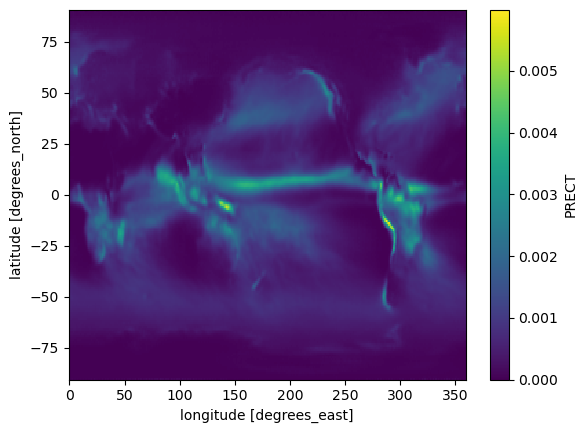

In [83]:
DSpr.plot()

## Notes - With Judith 
- RESTOM
- TWP + MASS conservation
- Seasonal Cycle 
- Vorticity + ENSO response.
- Geopotential Height / response / M.O.V.
- SP 
- Biases = CESM Biases
- Extremes
- EP-flux 

In [81]:
FNS = sorted(glob.glob('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00185/2001-01-01T00Z/*.nc'))

In [83]:
print('...opening...')
ds = xr.open_mfdataset(
                FNS[:200],
                chunks={'time': 'auto'},  # Automatically chunk along time dimension
                parallel=True,            # Enable parallel processing
                engine='netcdf4'          # Explicitly specify NetCDF4 engine
            )
print('...opened files....')
ds

In [17]:
ds_avg = ds.resample(time="1ME").mean()

In [18]:
ds_avg

<xarray.Dataset> Size: 64MB
Dimensions:    (time: 2, level: 32, latitude: 192, longitude: 288)
Coordinates:
  * level      (level) int64 256B 0 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
  * latitude   (latitude) float32 768B -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * time       (time) datetime64[ns] 16B 2001-01-31 2001-02-28
Data variables: (12/21)
    U          (time, level, latitude, longitude) float32 14MB dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    V          (time, level, latitude, longitude) float32 14MB dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    T          (time, level, latitude, longitude) float32 14MB dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    Qtot       (time, level, latitude, longitude) float32 14MB dask.array<chunksize=(1, 32, 192, 288), meta=np.ndarray>
    PS         (time, latitude, longitude) float32 442kB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    TREFHT     (time, latitude, longitude) float32 442kB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    ...         ...
    FSNS       (time, latitude, longitude) float32 442kB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    FLNS       (time, latitude, longitude) float32 442kB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    FSNT       (time, latitude, longitude) float32 442kB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    FLNT       (time, latitude, longitude) float32 442kB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    SHFLX      (time, latitude, longitude) float32 442kB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    LHFLX      (time, latitude, longitude) float32 442kB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.11

In [2]:
DS = xr.open_dataset('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00185/2001-01-01T00Z/1D/averaged_1D.nc')
DS

<xarray.Dataset> Size: 808MB
Dimensions:    (time: 1826, latitude: 192, longitude: 288)
Coordinates:
  * latitude   (latitude) float32 768B -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * time       (time) datetime64[ns] 15kB 2001-01-01 2001-01-02 ... 2005-12-31
Data variables:
    PRECT      (time, latitude, longitude) float32 404MB ...
    TREFHT     (time, latitude, longitude) float32 404MB ...
Attributes:
    Conventions:  CF-1.11

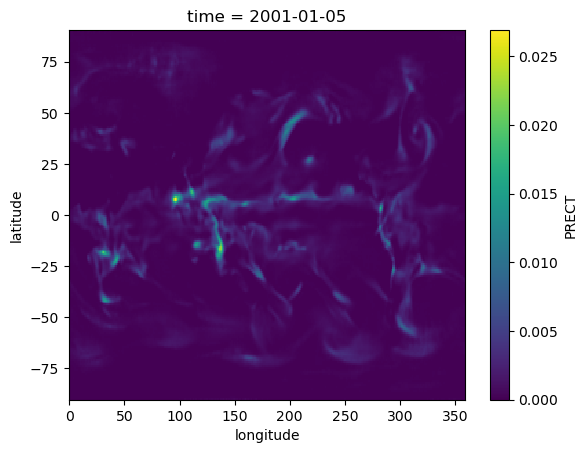

In [10]:
DS['PRECT'][4].plot()

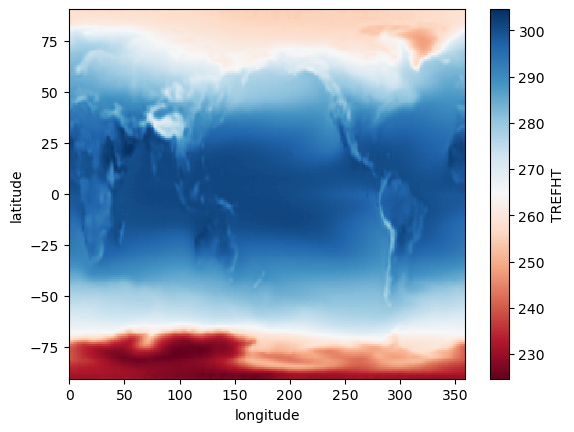

In [3]:
(DS['TREFHT'][1:].mean(['time'])).plot(cmap='RdBu')
plt.show()

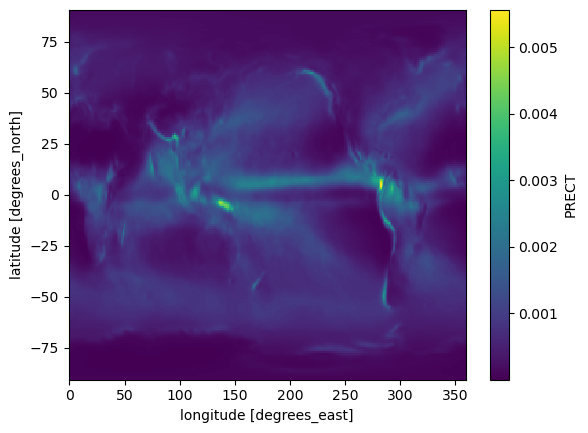

In [3]:
DSdo_1 = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_1980_ERA5scaled_F32.zarr')
DSdo_2 = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_1981_ERA5scaled_F32.zarr')
DSdo_3 = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_1982_ERA5scaled_F32.zarr')
DSdo_4 = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_1983_ERA5scaled_F32.zarr')
DSdo_5 = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_1984_ERA5scaled_F32.zarr')

DSzarr1 = xr.concat([DSdo_1, DSdo_2, DSdo_3, DSdo_4, DSdo_5], dim='time')

DSdo_1 = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_2000_ERA5scaled_F32.zarr')
DSdo_2 = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_2001_ERA5scaled_F32.zarr')
DSdo_3 = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_2002_ERA5scaled_F32.zarr')
DSdo_4 = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_2003_ERA5scaled_F32.zarr')
DSdo_5 = xr.open_zarr('/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_2004_ERA5scaled_F32.zarr')

DSzarr2 = xr.concat([DSdo_1, DSdo_2, DSdo_3, DSdo_4, DSdo_5], dim='time')


DSzarr1['PRECT'].mean('time').plot()
plt.show()

## Open Runs

In [5]:
DS1 = xr.open_dataset('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00190/2001-01-01T00Z/1D/averaged_1D.nc')
DS2 = xr.open_dataset('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00191/2001-01-01T00Z/1D/averaged_1D.nc')


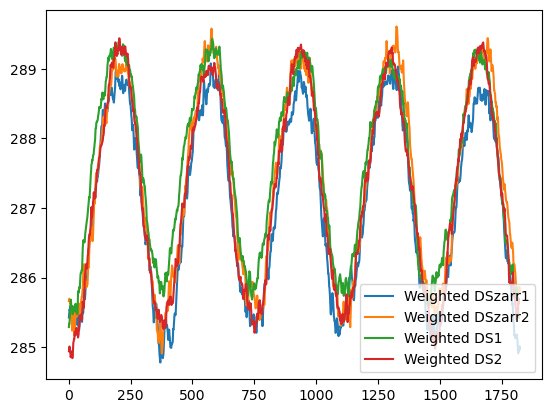

In [6]:
import numpy as np

# Calculate latitude weights (cosine of latitude in radians)
weights = np.cos(np.deg2rad(DSzarr1['latitude']))

# Normalize weights to sum to 1
weights /= weights.sum()

# Apply latitude weighting to the mean
weighted_mean_zarr1 = (DSzarr1['TREFHT']
                      .resample(time='1D').mean()
                      .weighted(weights)
                      .mean(['longitude', 'latitude']))

# Apply latitude weighting to the mean
weighted_mean_zarr2 = (DSzarr2['TREFHT']
                      .resample(time='1D').mean()
                      .weighted(weights)
                      .mean(['longitude', 'latitude']))


weighted_mean1 = (DS1['TREFHT'][5:]
                 .weighted(weights)
                 .mean(['longitude', 'latitude']))

weighted_mean2 = (DS2['TREFHT'][5:]
                 .weighted(weights)
                 .mean(['longitude', 'latitude']))

# # Plot the results
plt.plot(weighted_mean_zarr1.values, label='Weighted DSzarr1')
plt.plot(weighted_mean_zarr2.values, label='Weighted DSzarr2')
plt.plot(weighted_mean1.values, label='Weighted DS1')
plt.plot(weighted_mean2.values, label='Weighted DS2')

# plt.ylim([274, 281])
plt.legend()
plt.show()


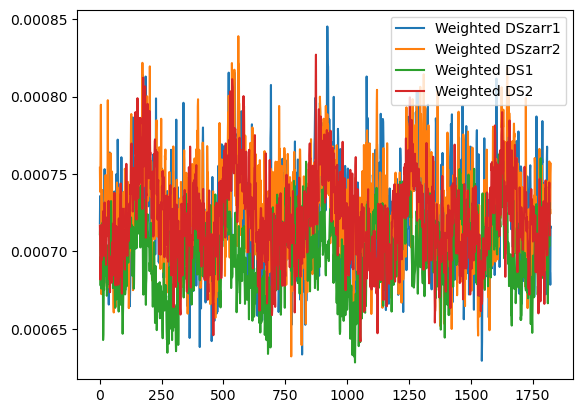

In [7]:
import numpy as np

# Calculate latitude weights (cosine of latitude in radians)
weights = np.cos(np.deg2rad(DSzarr1['latitude']))

# Normalize weights to sum to 1
weights /= weights.sum()

# Apply latitude weighting to the mean
weighted_mean_zarr1 = (DSzarr1['PRECT']
                      .resample(time='1D').mean()
                      .weighted(weights)
                      .mean(['longitude', 'latitude']))

# Apply latitude weighting to the mean
weighted_mean_zarr2 = (DSzarr2['PRECT']
                      .resample(time='1D').mean()
                      .weighted(weights)
                      .mean(['longitude', 'latitude']))


weighted_mean1 = (DS1['PRECT'][5:]
                 .weighted(weights)
                 .mean(['longitude', 'latitude']))

weighted_mean2 = (DS2['PRECT'][5:]
                 .weighted(weights)
                 .mean(['longitude', 'latitude']))

# # Plot the results
plt.plot(weighted_mean_zarr1.values, label='Weighted DSzarr1')
plt.plot(weighted_mean_zarr2.values, label='Weighted DSzarr2')
plt.plot(weighted_mean1.values, label='Weighted DS1')
plt.plot(weighted_mean2.values, label='Weighted DS2')

plt.legend()
plt.show()


In [3]:
import xarray as xr

In [3]:
DS = xr.open_dataset('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00191/1981-01-01T00Z/pred_1981-01-01T00Z_00246204.nc')

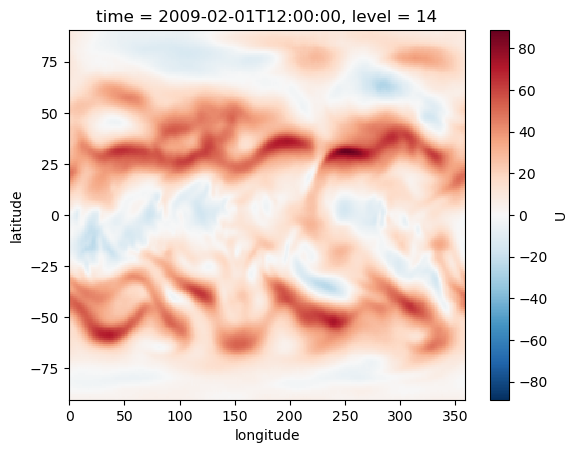

In [9]:
DS['U'].sel(level=14).squeeze().plot()

## Look at Surface Temp Seasonal Cycle

In [128]:
source_dir = '/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00191_nb/model_00223/1981-01-02T00Z/'
avg_window = '1D'
name_string= 'hoponpop'
variables = ['PRECT','TREFHT']
avg_dir = os.path.join(source_dir, avg_window)

FNS = sorted(glob.glob(f'{source_dir}/pred*.nc'))
DSfirst = xr.open_dataset(FNS[0])
DSlast = xr.open_dataset(FNS[-1])

# Extract start and end year/month
start_year = DSfirst['time.year'].values[0]
start_month = DSfirst['time.month'].values[0]
end_year = DSlast['time.year'].values[0]
end_month = DSlast['time.month'].values[0]

# Create a list of months between start and end dates
date_range = pd.date_range(start=f'{start_year}-{start_month:02d}', 
                           end=f'{end_year}-{end_month:02d}', 
                           freq='MS')  # 'MS' is Month Start

# Convert to list of year-month strings
year_month_list = date_range.strftime('%Y-%m').tolist()

DS_index = xr.open_dataset(f'{source_dir}/datetimes_in_files.nc')

for ee,yml in enumerate(year_month_list):
    avg_file = os.path.join(avg_dir, f'averaged_{name_string}_{yml}_{avg_window}.nc')
    if ee == 0:
        break
print(avg_file)
Fil_idx_vals = DS_index.sel(time=yml)['index'].values

selected_files = [FNS[i] for i in Fil_idx_vals]
# DS_months = xr.open_mfdataset(selected_files, parallel=True, chunks={'time': 'auto'}, engine='netcdf4')

datasets = []
for ee,fn in enumerate(selected_files ):
    try:
        ds = xr.open_dataset(fn, chunks={'time': 'auto'}, engine='netcdf4')
        # Select variables during file opening if specified
        if variables:
            ds = ds[variables]
        datasets.append(ds)
    except Exception as e:
        print(f'Error opening {fn}: {e}')

print(datasets[0]['time'].values)
print(datasets[-1]['time'].values)


/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00191_nb/model_00223/1981-01-02T00Z/1D/averaged_hoponpop_1981-01_1D.nc
['1981-01-02T00:00:00.000000000']
['1981-01-31T12:00:00.000000000']


In [132]:
DS_index

<xarray.Dataset> Size: 701kB
Dimensions:  (time: 43799)
Coordinates:
  * time     (time) object 350kB 1981-01-02 06:00:00 ... 2011-01-01 18:00:00
Data variables:
    index    (time) int64 350kB ...

In [134]:
xr.open_dataset(sorted(glob.glob(f'{source_dir}/pred*.nc'))[0])

<xarray.Dataset> Size: 32MB
Dimensions:    (time: 1, level: 32, latitude: 192, longitude: 288)
Coordinates:
  * time       (time) datetime64[ns] 8B 1981-01-02
  * level      (level) int64 256B 0 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
  * latitude   (latitude) float32 768B -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
Data variables: (12/21)
    U          (time, level, latitude, longitude) float32 7MB ...
    V          (time, level, latitude, longitude) float32 7MB ...
    T          (time, level, latitude, longitude) float32 7MB ...
    Qtot       (time, level, latitude, longitude) float32 7MB ...
    PS         (time, latitude, longitude) float32 221kB ...
    TREFHT     (time, latitude, longitude) float32 221kB ...
    ...         ...
    FSNS       (time, latitude, longitude) float32 221kB ...
    FLNS       (time, latitude, longitude) float32 221kB ...
    FSNT       (time, latitude, longitude) float32 221kB ...
    FLNT       (time, latitude, longitude) float32 221kB ...
    SHFLX      (time, latitude, longitude) float32 221kB ...
    LHFLX      (time, latitude, longitude) float32 221kB ...
Attributes:
    Conventions:  CF-1.11
    scaling:      rescaled

In [84]:
conc = []
for yryr in range(1979,2015):
    DSdo_1 = xr.open_zarr(f'/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate_{yryr}_ERA5scaled_F32.zarr')
    conc.append(DSdo_1)

DSzarr1 = xr.concat(conc, dim='time')
FNS=sorted(glob.glob('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00191_nb/model_00223/1981-01-02T00Z/1D/averaged_UVTQtotPSPRECTTREFHT*'))
DSs = xr.open_mfdataset(FNS)

## Surface Temp Signal

In [142]:
# Assuming `ds` is your xarray.Dataset or xarray.DataArray
# Step 1: Identify duplicates in the 'time' coordinate
duplicates = DSs['time'].to_index().duplicated(keep='first')

# Step 2: Use the inverse of duplicates to select only unique time entries
ds_unique = DSs.isel(time=~duplicates)

In [143]:
import numpy as np

# Calculate latitude weights (cosine of latitude in radians)
weights = np.cos(np.deg2rad(DSs['latitude']))

# Normalize weights to sum to 1
weights /= weights.sum()

# Apply latitude weighting to the mean
weighted_mean_zarr1 = (DSzarr1['T'].isel(level=31)
                      .resample(time='1D').mean()
                      .weighted(weights)
                      .mean(['longitude', 'latitude']))

weighted_mean1 = (ds_unique['T'].isel(level=31)
                 .weighted(weights)
                 .mean(['longitude', 'latitude']))

dwmz = weighted_mean_zarr1.values
dwm = weighted_mean1.values

detrended_dwmz = detrend(dwmz)
detrended_dwm = detrend(dwm)
# # Plot the results
plt.plot(detrended_dwmz, label='Weighted DSzarr1')
plt.plot(detrended_dwm, label='Weighted DS1')

# plt.ylim([274, 281])
plt.legend()
plt.show()


ValueError: array must not contain infs or NaNs

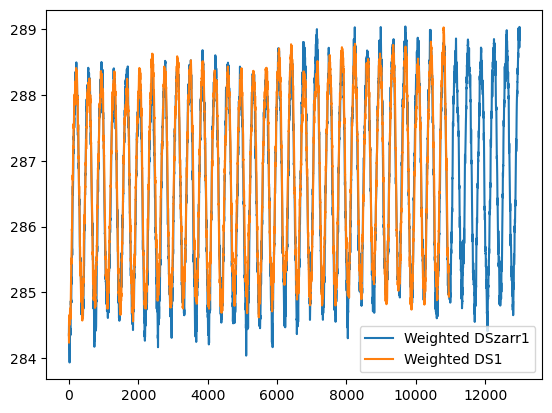

In [152]:
# # Plot the results
plt.plot(dwmz[:13000], label='Weighted DSzarr1')
plt.plot(dwm[:13000], label='Weighted DS1')

# plt.ylim([274, 281])
plt.legend()
plt.show()

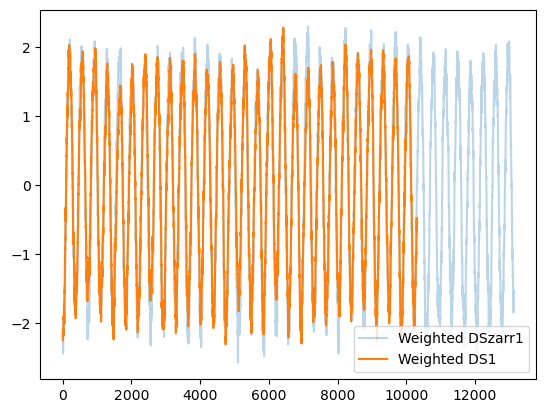

In [35]:
# # Plot the results
plt.plot(detrended_dwmz[10:], label='Weighted DSzarr1',alpha=0.3)
plt.plot(detrended_dwm[10:], label='Weighted DS1')

# plt.ylim([274, 281])
plt.legend()
plt.show()

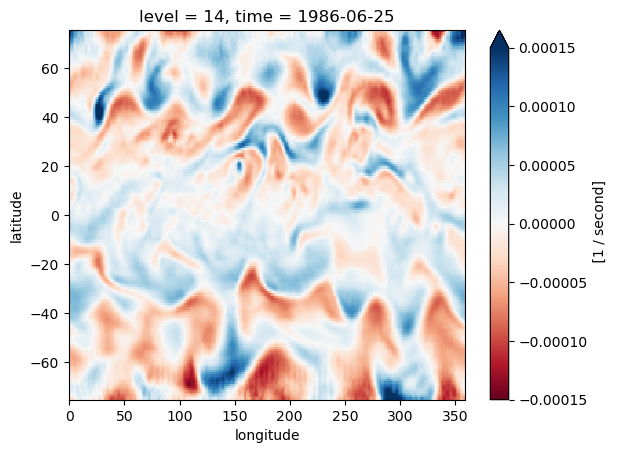

In [45]:
import metpy.calc as mpcalc
from metpy.units import units
import xarray as xr
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")


# Select level 14 winds across time
level_14 = 14
lalabounds = 75
U_14 = DSs['U'].sel(level=level_14).isel(time=slice(0, 2000)).sel(latitude=slice(-lalabounds,lalabounds)).load()
V_14 = DSs['V'].sel(level=level_14).isel(time=slice(0, 2000)).sel(latitude=slice(-lalabounds,lalabounds)).load()

# Assign units
U_14 = U_14 * units('m/s')
V_14 = V_14 * units('m/s')

# Calculate grid spacing
lat = DSs['latitude'].sel(latitude=slice(-lalabounds,lalabounds)).squeeze()
lon = DSs['longitude']

# Broadcast lat/lon to 2D
lon_2d, lat_2d = np.meshgrid(lon, lat)

# Calculate grid spacing
dx, dy = mpcalc.lat_lon_grid_deltas(lon_2d, lat_2d)

# Vorticity function (handling time dimension separately)
def calc_vort(U, V):
    return mpcalc.vorticity(U, V, dx=dx, dy=dy)

# Apply the function across time using list comprehension (avoids xarray dimension mismatch)
vorticity = xr.concat(
    [calc_vort(U_14.isel(time=t).squeeze(), V_14.isel(time=t).squeeze()) for t in range(U_14.sizes['time'])],
    dim='time'
)

vorticity['time'] = U_14['time']  # Reattach the time coordinate
vorticity = vorticity.assign_coords(level=level_14)

# Plot one time step to check
vorticity.isel(time=1999).plot(cmap='RdBu',vmin = -0.00015, vmax=0.00015)
plt.show()

## Torch Harmonics CPU stuff.

In [132]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
FNS = sorted(glob.glob('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00191/1981-01-02T00Z/1D/averaged_UVTQtotPSPRECTTREFHT*'))
DSs = xr.open_mfdataset(FNS)
nlat = DSs.sizes['latitude']
nlon = DSs.sizes['longitude']
ntime = DSs.sizes['time']

# Initialize Diffusion and Pole Filter
DPF = plf.Diffusion_and_Pole_Filter(nlat=nlat, nlon=nlon, device=device)

# Initialize lists to store results for all times
streamfunc_list = []
velocity_potential_list = []
U_rot_list = []
V_rot_list = []
vorticity_list = []
divergence_list = []

# Loop over all time steps
for t in range(ntime):
    if (t + 1) % 100 == 0:
        print(f'Processing timestep {t + 1}/{ntime}')
    
    # Extract U and V at each time step
    U = DSs['U'].isel(time=t).sel(level=14).values
    V = DSs['V'].isel(time=t).sel(level=14).values
    
    # Convert to Torch tensors
    U = torch.tensor(U).clone().detach().to(device)
    V = torch.tensor(V).clone().detach().to(device)
    
    # Stack U and V
    ugrid = torch.stack((U, V)).to(device)
    
    # Compute vorticity and divergence
    vrt, div = DPF.vrtdivspec(ugrid)
    
    # 1. Compute Stream Function
    streamfunc_spec = - DPF.invlap * vrt
    streamfunc_spec *= torch.exp(-0.01 * (DPF.lap)**2)  # Smoothing
    streamfunc = DPF.spec2grid(streamfunc_spec)
    
    # 2. Compute Velocity Potential
    velocity_potential_spec = DPF.invlap * div
    velocity_potential_spec *= torch.exp(-0.01 * (DPF.lap)**2)  # Smoothing
    velocity_potential = DPF.spec2grid(velocity_potential_spec)
    
    # 3. Compute Rotational Wind Components (U_rot, V_rot)
    U_rot, V_rot = DPF.getuv(torch.stack((streamfunc_spec, torch.zeros_like(streamfunc_spec)), dim=0))
    
    # Store results (detach and move to CPU for xarray compatibility)
    streamfunc_list.append(streamfunc.cpu().detach())
    velocity_potential_list.append(velocity_potential.cpu().detach())
    U_rot_list.append(U_rot.cpu().detach())
    V_rot_list.append(V_rot.cpu().detach())
    
    # Store vorticity and divergence
    vorticity_list.append(DPF.spec2grid(vrt.cpu().detach()))
    divergence_list.append(DPF.spec2grid(div.cpu().detach()))

# Stack results along time dimension
streamfunc_stack = torch.stack(streamfunc_list)
velocity_potential_stack = torch.stack(velocity_potential_list)
U_rot_stack = torch.stack(U_rot_list)
V_rot_stack = torch.stack(V_rot_list)
vorticity_stack = torch.stack(vorticity_list)
divergence_stack = torch.stack(divergence_list)

# Convert to xarray DataArrays with appropriate dimensions
streamfunc_da = xr.DataArray(
    streamfunc_stack.numpy(),
    dims=['time', 'latitude', 'longitude'],
    coords={'time': DSs['time'], 'latitude': DSs['latitude'], 'longitude': DSs['longitude']},
    name='stream_function'
)

velocity_potential_da = xr.DataArray(
    velocity_potential_stack.numpy(),
    dims=['time', 'latitude', 'longitude'],
    coords={'time': DSs['time'], 'latitude': DSs['latitude'], 'longitude': DSs['longitude']},
    name='velocity_potential'
)

U_rot_da = xr.DataArray(
    U_rot_stack.numpy(),
    dims=['time', 'latitude', 'longitude'],
    coords={'time': DSs['time'], 'latitude': DSs['latitude'], 'longitude': DSs['longitude']},
    name='U_rot'
)

V_rot_da = xr.DataArray(
    V_rot_stack.numpy(),
    dims=['time', 'latitude', 'longitude'],
    coords={'time': DSs['time'], 'latitude': DSs['latitude'], 'longitude': DSs['longitude']},
    name='V_rot'
)

vorticity_da = xr.DataArray(
    vorticity_stack.numpy(),
    dims=['time', 'latitude', 'longitude'],
    coords={'time': DSs['time'], 'latitude': DSs['latitude'], 'longitude': DSs['longitude']},
    name='vorticity'
)

divergence_da = xr.DataArray(
    divergence_stack.numpy(),
    dims=['time', 'latitude', 'longitude'],
    coords={'time': DSs['time'], 'latitude': DSs['latitude'], 'longitude': DSs['longitude']},
    name='divergence'
)

# Merge into a single dataset and save
DSmerged = xr.merge([streamfunc_da, velocity_potential_da, U_rot_da, V_rot_da, vorticity_da, divergence_da])
DSmerged.to_netcdf('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00191/1981-01-02T00Z/1D/SF_VP_and_associates.nc')

Processing timestep 100/10317
Processing timestep 200/10317
Processing timestep 300/10317
Processing timestep 400/10317
Processing timestep 500/10317
Processing timestep 600/10317
Processing timestep 700/10317
Processing timestep 800/10317
Processing timestep 900/10317
Processing timestep 1000/10317
Processing timestep 1100/10317
Processing timestep 1200/10317
Processing timestep 1300/10317
Processing timestep 1400/10317
Processing timestep 1500/10317
Processing timestep 1600/10317
Processing timestep 1700/10317
Processing timestep 1800/10317
Processing timestep 1900/10317
Processing timestep 2000/10317
Processing timestep 2100/10317
Processing timestep 2200/10317
Processing timestep 2300/10317
Processing timestep 2400/10317
Processing timestep 2500/10317
Processing timestep 2600/10317
Processing timestep 2700/10317
Processing timestep 2800/10317
Processing timestep 2900/10317
Processing timestep 3000/10317
Processing timestep 3100/10317
Processing timestep 3200/10317
Processing timest

## Look at the ENSO signal
- smooth over 30 days, select winter, and regress

### Functions 

In [171]:
def compute_regression_slopes(DS, DSvar, vardo='TREFHT', re_vars = ['stream_function','vorticity'], region_lat=(-5, 5), region_lon=(190, 240)):
    """
    Compute the regression slopes of each variable re_vars with respect to the spatial mean of vardo
    over a specified region.

    Parameters:
    DS (xarray.Dataset): The dataset containing the variables.
    region_lat (tuple): Latitude bounds for selecting the region (default: (-5, 5)).
    region_lon (tuple): Longitude bounds for selecting the region (default: (190, 240)).

    Returns:
    dict: A dictionary containing the slope datasets for each variable (PS, PRECT, TREFHT).
    """
    
    # Step 1: Select the mean of TREFHT over the specified region
    trefht_mean = DSvar[vardo].sel(latitude=slice(*region_lat), longitude=slice(*region_lon)).mean(dim=['latitude', 'longitude'])
    
    # Step 2: Demean the independent variable (TREFHT)
    trefht_mean_demeaned = trefht_mean - trefht_mean.mean(dim='time')
    
    # Step 3: Loop over each variable and compute the slope at each (lat, lon) point
    regression_slopes = {}
    for var_name in re_vars:
        # Demean the dependent variable at each (lat, lon) point
        y = DS[var_name]
        y_demeaned = y - y.mean(dim='time')
        
        # Compute the slope (cov(y, x) / var(x)) at each (lat, lon) point
        slope = (y_demeaned * trefht_mean_demeaned).mean(dim='time') / (trefht_mean_demeaned ** 2).mean(dim='time')
        
        # Store the slope result for this variable
        regression_slopes[var_name] = slope
    
    return regression_slopes

## 30-day rolling 

In [153]:
%%time
DStref = DSs['TREFHT']
DStref_rolling = DStref.rolling(time=30, center=True,min_periods=1).mean().load()
print('done 1')
Merged_rolling = DSmerged.rolling(time=30, center=True,min_periods=1).mean().load()
print('done 2')
DJFM_tref = DStref_rolling.sel(time=Merged_rolling['time'].dt.month.isin([12, 1, 2, 3]))
DJFM_mroll = Merged_rolling.sel(time=Merged_rolling['time'].dt.month.isin([12, 1, 2, 3]))


done 1
done 2
CPU times: user 3min 55s, sys: 1min 59s, total: 5min 55s
Wall time: 5min 50s


In [172]:
regression_slopes = compute_regression_slopes(DJFM_mroll, DJFM_tref.to_dataset(name='TREFHT'), vardo='TREFHT', re_vars = ['stream_function','vorticity'], region_lat=(-5, 5), region_lon=(190, 240))

In [180]:
regression_slopes = compute_regression_slopes(DJFM_tref, DJFM_tref.to_dataset(name='TREFHT'), vardo='TREFHT', re_vars = ['TREFHT'], region_lat=(-5, 5), region_lon=(190, 240))


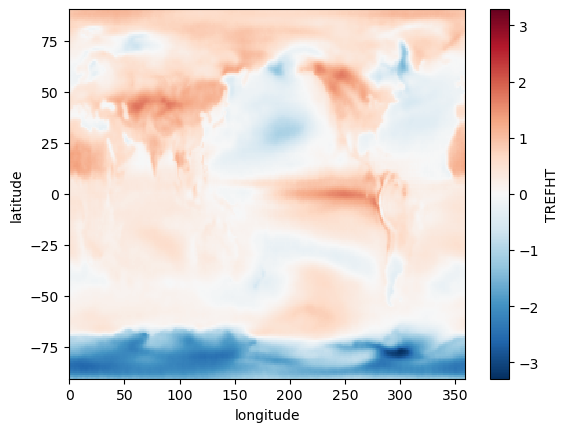

In [182]:
regression_slopes['TREFHT'].plot()
plt.show()

In [178]:
DJFM_mroll

<xarray.Dataset> Size: 9GB
Dimensions:             (time: 3477, latitude: 192, longitude: 288)
Coordinates:
  * time                (time) datetime64[ns] 28kB 1981-01-02 ... 2009-03-31
  * latitude            (latitude) float32 768B -90.0 -89.06 ... 89.06 90.0
  * longitude           (longitude) float32 1kB 0.0 1.25 2.5 ... 357.5 358.8
Data variables:
    stream_function     (time, latitude, longitude) float64 2GB 1.411e+08 ......
    velocity_potential  (time, latitude, longitude) float64 2GB 4.229e+06 ......
    U_rot               (time, latitude, longitude) float64 2GB 5.372e+12 ......
    V_rot               (time, latitude, longitude) float64 2GB 1.646e+13 ......
    vorticity           (time, latitude, longitude) float64 2GB 0.0001292 ......
    divergence          (time, latitude, longitude) float64 2GB -5.38e-05 ......

In [156]:
xr.open_dataset('/glade/derecho/scratch/wchapman/CREDIT/cesm_wxformer_00191_nb/model_00223/1979-01-01T00Z/pred_1979-01-01T00Z_006.nc')

<xarray.Dataset> Size: 32MB
Dimensions:    (time: 1, level: 32, latitude: 192, longitude: 288)
Coordinates:
  * time       (time) datetime64[ns] 8B 1979-01-01T06:00:00
  * level      (level) int64 256B 0 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
  * latitude   (latitude) float32 768B -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
Data variables: (12/21)
    U          (time, level, latitude, longitude) float32 7MB ...
    V          (time, level, latitude, longitude) float32 7MB ...
    T          (time, level, latitude, longitude) float32 7MB ...
    Qtot       (time, level, latitude, longitude) float32 7MB ...
    PS         (time, latitude, longitude) float32 221kB ...
    TREFHT     (time, latitude, longitude) float32 221kB ...
    ...         ...
    FSNS       (time, latitude, longitude) float32 221kB ...
    FLNS       (time, latitude, longitude) float32 221kB ...
    FSNT       (time, latitude, longitude) float32 221kB ...
    FLNT       (time, latitude, longitude) float32 221kB ...
    SHFLX      (time, latitude, longitude) float32 221kB ...
    LHFLX      (time, latitude, longitude) float32 221kB ...
Attributes:
    Conventions:  CF-1.11

In [ ]:
ls 